In [1]:
import pickle 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
def plot(fig, ax, x, y, name, baseline=None):
    # Log‐scale on x
    # Main curve
    ax.plot(x, y,
            marker='o',         # add markers at each point
            linestyle="dashed",
            linewidth=1.5,
            alpha=0.68,
            label=name)

    # Axis labels with nice font size and (La)TeX where helpful
    ax.set_xlabel(r'$\sigma_{\rm noise}$', fontsize=14)
    ax.set_ylabel('FID score', fontsize=14)

    # Ticks
    ax.tick_params(axis='both', which='major', labelsize=12)

    if baseline:
# Draw the horizontal “baseline” and annotate it
        ax.axhline(y=baseline,
                   color='black',
                   linestyle='--',
                   linewidth=1.5,
                   label=None)  # we’ll label it via text rather than legend

        # Place the text slightly above and to the right of the leftmost x
        # Adjust `x_text`/`y_text` if this overlaps your data
        x_text = x.min() * 1.2
        y_text = baseline * 1.1
        ax.text(x_text, y_text,
                rf'Noiseless score FID = {baseline:.2f}',
                color='black',
                fontsize=12,
                ha='left',    # horizontal alignment
                va='bottom',  # vertical alignment
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7)
        )

    # Optional legend for the main curve
    ax.legend(fontsize=12, loc='upper right')

    

In [19]:
def process_and_plot(paths, distr_name, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.set_xscale('log', base=2)
    ax.set_yscale('log', base=10)

    ax.set_title(f"FID vs. Noise Level for {title}")
    for path, name in zip(fid_paths, distribution_names):
        file_path = os.path.join(path, "fid_cache.pkl")
        with open(file_path, 'rb') as handle:
            b = pickle.load(handle)
        x = []
        y = []
        print(b)
        for k, v in b.items():
            if k != 0:
                x.append(k)
                y.append(v)

        x = np.array(x)
        srt_index = np.argsort(x)
        x = x[srt_index]
        y = np.array(y)
        y = y[srt_index]


        plot(fig, ax, x, y, name, b.get(0, None))

    fig.tight_layout()


{0.25: 17.692522048950195, 0.5: 17.66400718688965, 1.0: 19.876197814941406, 2.0: 52.822532653808594, 3.0: 162.50210571289062, 4.0: 226.06246948242188}
{0.0: 17.720600128173828, 0.25: 17.929485321044922, 0.5: 17.837596893310547, 1.0: 18.25535774230957, 2.0: 27.479759216308594, 4.0: 139.7415313720703, 3.0: 63.43263626098633}
{0.25: 17.81397247314453, 0.5: 17.74090576171875, 1.0: 22.26218605041504, 2.0: 93.2056884765625, 3.0: 226.79373168945312, 4.0: 279.2218933105469}
{0.0: 17.720600128173828, 0.25: 17.94976234436035, 0.5: 17.943607330322266, 1.0: 18.488597869873047, 2.0: 27.13142204284668, 4.0: 139.79244995117188, 3.0: 62.89725112915039}


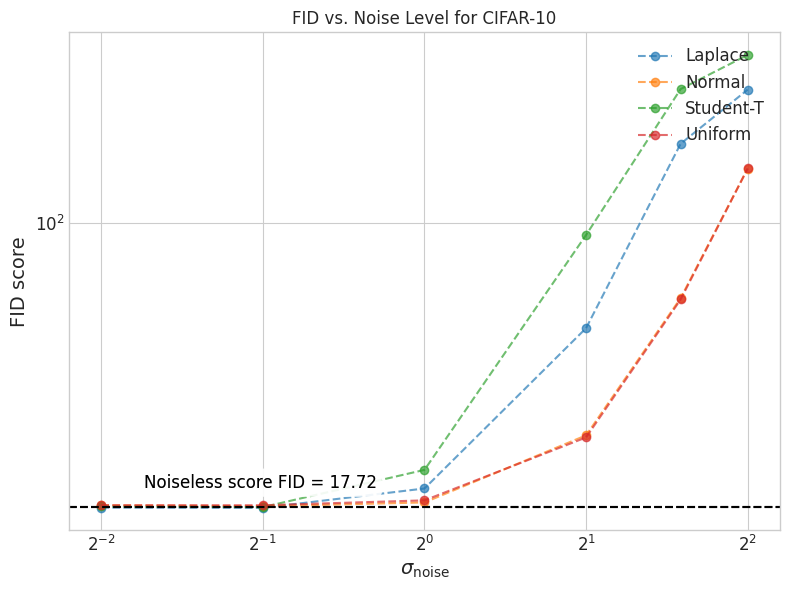

In [20]:
dataset_path = "../src/data/noisy_score_images_cifar10/"
distrib = list(filter(lambda x: ".ipynb" not in x,  os.listdir(dataset_path)))
fid_paths = [os.path.join(dataset_path, dist) for dist in distrib]
distribution_names = [{"laplace": "Laplace", "normal": "Normal", 
  "student_t": "Student-T", "uniform": "Uniform"}[dist] for dist in distrib]
process_and_plot(fid_paths, distribution_names, "CIFAR-10")
plt.savefig("cifar.pdf", bbox_inches='tight')

{0.25: 73.95560455322266, 0.5: 74.87921142578125, 1.0: 134.7245635986328, 2.0: 379.6045837402344, 3.0: 452.36383056640625, 4.0: 417.47662353515625}
{0.0: 74.134765625, 0.25: 72.97465515136719, 0.5: 72.656005859375, 1.0: 83.37246704101562, 2.0: 299.87176513671875, 4.0: 433.95233154296875, 3.0: 388.1102600097656}
{0.25: 74.4303970336914, 0.5: 77.96501922607422, 1.0: 219.82174682617188, 2.0: 395.6665954589844, 3.0: 428.4945068359375, 4.0: 415.0157775878906}
{0.0: 74.134765625, 0.25: 71.00502014160156, 0.5: 71.68844604492188, 1.0: 82.07296752929688, 2.0: 298.38275146484375, 3.0: 383.0343933105469, 4.0: 432.13531494140625}


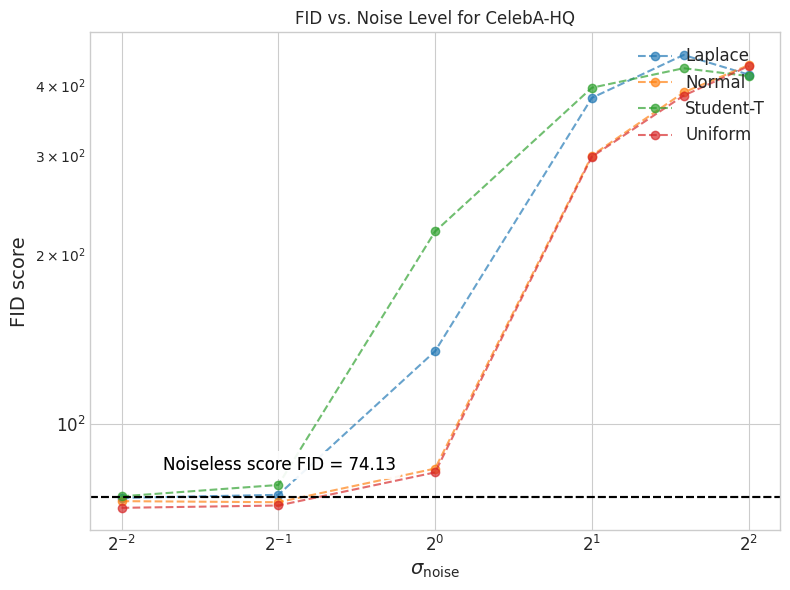

In [21]:
dataset_path = "../src/data/noisy_score_images_celebahq/"
distrib = list(filter(lambda x: ".ipynb" not in x,  os.listdir(dataset_path)))
fid_paths = [os.path.join(dataset_path, dist) for dist in distrib]
distribution_names = [{"laplace": "Laplace", "normal": "Normal", 
  "student_t": "Student-T", "uniform": "Uniform"}[dist] for dist in distrib]
process_and_plot(fid_paths, distribution_names, "CelebA-HQ")
plt.savefig("celeba.pdf", bbox_inches='tight')